# Capstone Presentation
You're ready to put into practice everything you've learned so far.

First: Go out and find a dataset of interest. It could be from one of our recommended resources, some other aggregation, or scraped yourself. Just make sure it has lots of variables in it, including an outcome of interest to you.

Second: Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

Third: Model your outcome of interest. You should try several different approaches and really work to tune a variety of models before using the model evaluation techniques to choose what you consider to be the best performer. Make sure to think about explanatory versus predictive power and experiment with both.

So, here is the deliverable: Prepare a slide deck and 15 minute presentation that guides viewers through your model. Be sure to cover a few specific things:

* A specified research question your model addresses
* How you chose your model specification and what alternatives you compared it to
* The practical uses of your model for an audience of interest
* Any weak points or shortcomings of your model

This presentation is not a drill. You'll be presenting this slide deck live to a group as the culmination of your work in the last two supervised learning units. As a secondary matter, your slides and / or the Jupyter notebook you use or adapt them into should be worthy of inclusion as examples of your work product when applying to jobs.

Good luck!

# Dataset Information:

This database once contained 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the [Cleveland database](https://www.kaggle.com/ronitf/heart-disease-uci) is the only one that has been used by ML researchers to  this date. The "target" field refers to the presence of heart disease in the patient. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (value 1) from absence (value 0). 

The names and social security numbers of the patients were recently removed from the database. 

### Source:

### Acknowledgements

##### Creators: 
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. 
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. 
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. 
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

##### Donor: 
David W. Aha (aha '@' ics.uci.edu) (714) 856-8779


See if you can find any other trends in heart data to predict certain cardiovascular events or find any clear indications of heart health.



[data](https://www.kaggle.com/ronitf/heart-disease-uci)


[data_full](https://archive.ics.uci.edu/ml/datasets/heart%2BDisease)

In [131]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn import ensemble
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

import warnings 
warnings.simplefilter('ignore')

from sklearn.externals import joblib 

%matplotlib inline

In [116]:
heart = pd.read_csv('heart_disease.csv')
heart.columns = ['age','sex','chest_pain','resting_bp',
                 'serum_chol','fasting_bs','resting_ecg',
                 'max_hr','ex_ang','st_depress',
                 'slope_st_depress','num_mv', 'thalassemia','target']
heart = heart.dropna()

# Exploration of Data

In [117]:
print(heart.head())
print(heart.info())

   age  sex  chest_pain  resting_bp  serum_chol  fasting_bs  resting_ecg  \
0   63    1           3         145         233           1            0   
1   37    1           2         130         250           0            1   
2   41    0           1         130         204           0            0   
3   56    1           1         120         236           0            1   
4   57    0           0         120         354           0            1   

   max_hr  ex_ang  st_depress  slope_st_depress  num_mv  thalassemia  target  
0     150       0         2.3                 0       0            1       1  
1     187       0         3.5                 0       0            2       1  
2     172       0         1.4                 2       0            2       1  
3     178       0         0.8                 2       0            2       1  
4     163       1         0.6                 2       0            2       1  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 3

## Feature Information: 
1. age = age 
2. sex = sex 
3. chest_pain = chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain,4 = asymptomatic ) 
4. resting_bp = resting blood pressure 
5. serum_chol = serum cholestoral in mg/dl 
6. fasting_bp = fasting blood sugar > 120 mg/dl
7. resting_ecg = resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria )
8. max_hr = maximum heart rate achieved 
9. ex_ang = exercise induced angina (binary, 1 = yes) 
10. st_depress = ST depression induced by exercise relative to rest 
11. the slope of the peak exercise ST segment 
12. number of major vessels (values 0-3) colored by flourosopy 
13. thalassemia = thalassemia (3 = normal, 6 = fixed defect, 7 = reversable defect)
14. target = presence of heart disease (binary, 1 = yes)


* Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood. It may feel like pressure or squeezing in your chest. The discomfort also can occur in your shoulders, arms, neck, jaw, or back. Angina pain may even feel like indigestion.

* ST depression refers to a finding on an electrocardiogram wherein the trace in the ST segment is abnormally low below the baseline.

* Thalassemia is an inherited blood disorder characterized by less hemoglobin and fewer red blood cells in your body than normal. Hemoglobin is the substance in your red blood cells that allows them to carry oxygen. The low hemoglobin and fewer red blood cells of thalassemia may cause anemia, leaving you fatigued. If you have mild thalassemia, you may not need treatment. But if you have a more severe form of the disorder, you may need regular blood transfusions. You can also take steps on your own to cope with fatigue, such as choosing a healthy diet and exercising regularly.

Despite the fact that chest_pain, resting_ecg, and thalassemia are all type int64, they are really categorical in nature so we should make dummies out of them to better the machine learning process later.

In [115]:
print(heart[['resting_bp','serum_chol','max_hr','st_depress']].describe())

       resting_bp  serum_chol      max_hr  st_depress
count  303.000000  303.000000  303.000000  303.000000
mean   131.623762  246.264026  149.646865    1.039604
std     17.538143   51.830751   22.905161    1.161075
min     94.000000  126.000000   71.000000    0.000000
25%    120.000000  211.000000  133.500000    0.000000
50%    130.000000  240.000000  153.000000    0.800000
75%    140.000000  274.500000  166.000000    1.600000
max    200.000000  564.000000  202.000000    6.200000


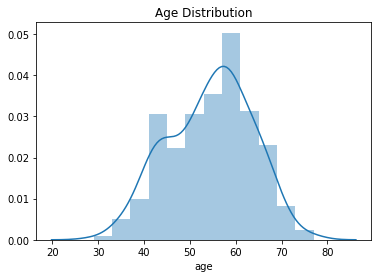

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64


<Figure size 432x288 with 0 Axes>

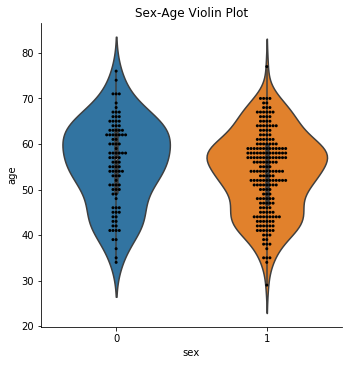

Male Age
 count    207.000000
mean      53.758454
std        8.883803
min       29.000000
25%       47.000000
50%       54.000000
75%       59.500000
max       77.000000
Name: age, dtype: float64

Female Age
 count    96.000000
mean     55.677083
std       9.409396
min      34.000000
25%      49.750000
50%      57.000000
75%      63.000000
max      76.000000
Name: age, dtype: float64


In [114]:
plt.figure()
sns.distplot(heart.age)
plt.title("Age Distribution")
plt.show()
print(heart.age.describe())

plt.figure()
g = sns.catplot(x='sex',y='age',data=heart,kind='violin')
sns.swarmplot(x='sex', y='age', color="k", size=3, data=heart, ax=g.ax)
plt.title("Sex-Age Violin Plot")
plt.show()


print('Male Age\n', heart['age'][heart.sex==1].describe())
print('\nFemale Age\n',heart['age'][heart.sex==0].describe())


We see that our age demographic is skewed to older with a mean of 54 and we have double the male observations than female observations. It's worth balancing the sex class later on before modeling.

,age,sex,chest_pain,resting_bp,serum_chol,fasting_bs,resting_ecg,max_hr,ex_ang,st_depress,slope_st_depress,num_mv,thalassemia,target,c1
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439,-0.176767
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937,-0.060800
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798,0.518660
resting_bp,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931,-0.060784
serum_chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239,-0.122281
fasting_bs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046,-0.017328
resting_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230,0.511723
max_hr,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741,0.283503
ex_ang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757,-0.255325
st_depress,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696,-0.213489


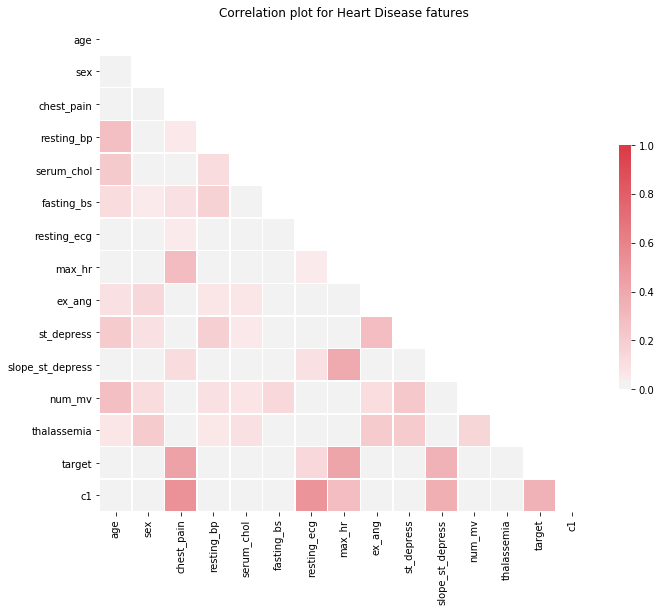

In [93]:
X = heart.drop('target',axis=1)
corr = heart.corr()
display(corr)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmin=0, vmax=1, mask=mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation plot for Heart Disease fatures")
plt.show()

# Feature engineering

Based on the correlation of our variables, we might be able to find some meaningful features to fit our model with!

In [92]:
heart['f1'] = heart.chest_pain * heart.resting_ecg *heart.max_hr * heart.slope_st_depress

## Making Dummies

Despite the fact that chest_pain, resting_ecg, and thalassemia are all type int64, they are really categorical in nature so we should make dummies out of them to better the machine learning process later.

In [ ]:
heart_dum = heart

def chest_pain_types(series):
    if heart['chest_pain'] == 1:
        return "typical angina"
    elif heart['chest_pain'] == 2:
        return "atypical angina"
    elif heart['chest_pain'] == 3:
        return "non-anginal pain"
    elif heart['chest_pain'] == 4:
        return "asymptomatic"

heart_dum['chest_types'] = heart['chest_pain'].apply(chest_pain_types)

def thalassemia_types(series):
    if heart['thalassemia'] == 3:
        return "thal_norm"
    elif heart['thalassemia'] == 6:
        return "thal_fixed"
    elif heart['thalassemia'] == 7:
        return "thal_reversable"

heart_dum['thal_types'] = heart['thalassemia'].apply(thalassemia_types)

def ecg_types(series):
    if heart['resting_ecg'] == 0:
        return "ecg_norm"
    elif heart['resting_ecg'] == 1:
        return "ecg_wave_abnormal"
    elif heart['resting_ecg'] == 2:
        return "ecg_hypertrophy"

heart_dum['ecg_types'] = heart['resting_ecg'].apply(ecg_types)

heart_dum = pd.concat([heart_dum,pd.get_dummies(heart_dum['chest_pain_types'])], axis=1)
heart_dum = pd.concat([heart_dum,pd.get_dummies(heart_dum['thal_types'])], axis=1)
heart_dum = pd.concat([heart_dum,pd.get_dummies(heart_dum['ecg_types'])], axis=1)

# Examination of non-tuned models

In [118]:
# Set inputs and output
X = heart.drop('target',axis=1)
y = heart['target']

#X = heart_dum.drop('target',axis=1)
#y = heart_dum['target']

# Initiate train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1,stratify=y)

In [165]:
start_time = time.time()

# Instantiate our model and store it in a new variable, then fit it.
bnb = BernoulliNB()
bnb.fit(X_train,y_train)

# Display our results.
print('--Bernoulli Model Results--')
print('Training Accuracy:\n   ', bnb.score(X_train,y_train))
print('Testing Accuracy:\n   ', bnb.score(X_test,y_test))

#print("\nNumber of mislabeled points out of a total {} points : {}".format(X_test.shape[0],(y_test != y_pred).sum()))
score = cross_val_score(bnb, X_test, y_test, cv=3)
print("\nCross Validation:\n   %0.2f (+/- %0.2f)" % (score.mean(), score.std()))

t= round((time.time() - start_time),4)
print("\n- %s seconds -" % t)

--Bernoulli Model Results--
Training Accuracy:
    0.8198529411764706
Testing Accuracy:
    0.9354838709677419

Cross Validation:
   0.76 (+/- 0.15)

- 0.0209 seconds -


In [166]:
start_time = time.time()

# Instantiate our model and store it in a new variable, then fit it.
knn = neighbors.KNeighborsRegressor()
knn.fit(X_train, y_train)

print('--KNN Model Results--')
print('Training Accuracy:\n   ', knn.score(X_train, y_train))
print('Testing Accuracy:\n   ', knn.score(X_test, y_test))

score = cross_val_score(knn, X_test, y_test, cv=3)
print("\nCross Validation:\n    %0.2f (+/- %0.2f)" % (score.mean(), score.std()))

t= round((time.time() - start_time),4)
print("\n- %s seconds -" % t)

--KNN Model Results--
Training Accuracy:
    0.3360069747166521
Testing Accuracy:
    0.20806722689075596

Cross Validation:
    0.01 (+/- 0.04)

- 0.0204 seconds -


In [167]:
start_time = time.time()

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier()
dtc = decision_tree.fit(X_train, y_train)

print('--Decision Tree Model Results--')
print('Training Accuracy:\n   ', dtc.score(X_train, y_train))
print('Testing Accuracy:\n   ', dtc.score(X_test, y_test))

score = cross_val_score(dtc, X_test, y_test, cv=3)
print('Cross Validation:\n   %0.2f +/- %0.2f' %(score.mean(),score.std()))

t= round((time.time() - start_time),4)
print("\n- %s seconds -" % t)

--Decision Tree Model Results--
Training Accuracy:
    1.0
Testing Accuracy:
    0.6774193548387096
Cross Validation:
   0.71 +/- 0.06

- 0.0188 seconds -


In [186]:
start_time = time.time()

# Initialize and fit our forrest of trees
rfc = ensemble.RandomForestClassifier()
rfc = rfc.fit(X_train, y_train)

print('--Random Forest Model Results--')
print('Training Accuracy:\n   ', rfc.score(X_train, y_train))
print('Testing Accuracy:\n   ', rfc.score(X_test, y_test))

score = cross_val_score(rfc, X_test, y_test, cv=3)
print('\nCross Validation:\n    %0.2f +/- %0.2f' %(score.mean(),score.std()))

t= round((time.time() - start_time),4)
print("\n- %s seconds -" % t)

--Random Forest Model Results--
Training Accuracy:
    0.9963235294117647
Testing Accuracy:
    0.8709677419354839

Cross Validation:
    0.80 +/- 0.10

- 0.0535 seconds -


In [171]:
start_time = time.time()

# Initialize and fit our gradient boost model
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X_train, y_train)

print('--Gradient Boost Model Results--')
print('Training Accuracy:\n   ', gbc.score(X_train, y_train))
print('Testing Accuracy:\n   ', gbc.score(X_test, y_test))

score = cross_val_score(gbc, X_test, y_test, cv=3)
print('\nCross Validation:\n    %0.2f +/- %0.2f' %(score.mean(),score.std()))

t= round((time.time() - start_time),4)
print("\n- %s seconds -" % t)

--Gradient Boost Model Results--
Training Accuracy:
    0.9963235294117647
Testing Accuracy:
    0.7741935483870968

Cross Validation:
    0.74 +/- 0.02

- 0.1622 seconds -


In [187]:
start_time = time.time()

# Initialize and fit our gradient boost model
abc = ensemble.AdaBoostClassifier()
abc.fit(X_train, y_train)

print('--Ada Boost Model Results--')
print('Training Accuracy:\n   ', abc.score(X_train, y_train))
print('Testing Accuracy:\n   ', abc.score(X_test, y_test))

score = cross_val_score(abc, X_test, y_test, cv=3)
print('\nCross Validation:\n    %0.2f +/- %0.2f' %(score.mean(),score.std()))

t= round((time.time() - start_time),4)
print("\n- %s seconds -" % t)

--Ada Boost Model Results--
Training Accuracy:
    0.9301470588235294
Testing Accuracy:
    0.8709677419354839

Cross Validation:
    0.84 +/- 0.05

- 0.2721 seconds -


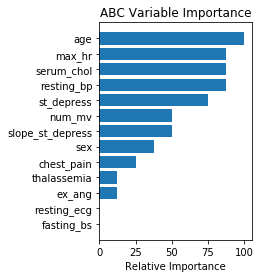

In [188]:
feature_importance = abc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('ABC Variable Importance')
plt.show()

In [153]:
print('Processing...')

start_time = time.time()

# Declare data preprocessing steps
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         ensemble.AdaBoostClassifier())

dt_stump = tree.DecisionTreeClassifier(max_features=1, max_depth=8, min_samples_leaf=1, random_state=1)

# Declare hyperparameters to tune
hyperparameters = { 'adaboostclassifier__base_estimator' : [dt_stump],
                  'adaboostclassifier__learning rate' : [0.8,0.9,1],
                  'adaboostclassifier__algorithm': ['SAMME’, ‘SAMME.R’],
                  'adaboostclassifier__n_estimators': [500,1500,2500],
                  'adaboostclassifier__random_state': [1]
                  }
 
# Tune model using cross-validation pipeline
rfc = GridSearchCV(estimator=pipeline,param_grid=hyperparameters, cv=10)
rfc.fit(X_train, y_train)

t= round((time.time() - start_time),4)
print("\n -- %s seconds for model fit --" % t)
                                                    
start_time = time.time()
                                                    
# Refit on the entire training set
# No additional code needed if clf.refit == True (default is True)
print('Best Parameters:\n ', rfc.best_params_)
print('Refit: ', rfc.refit)
 
# Evaluate model pipeline on test data
print('\nTraining Accuracy:\n   ', rfc.score(X_train, y_train))
print('Testing Accuracy:\n   ', rfc.score(X_test, y_test))

#score = cross_val_score(rfc, X_test, y_test, cv=10)
#print('\nCross Validation:\n    %0.2f +/- %0.2f' %(score.mean(),score.std()))
#print('MSE:\n ',mean_squared_error(y_test, y_pred))

t= round((time.time() - start_time),4)
print("\n -- %s seconds for results--" % t)

Processing...
Best Parameters:
  {'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 1, 'randomforestclassifier__n_estimators': 3500}
Refit:
  True
Training Accuracy:
    0.875
Testing Accuracy:
    0.8709677419354839
--- 27.5344 seconds ---


In [89]:
print('Processing...')

start_time = time.time()

# We'll make 5000 iterations, use  4-deep trees, set our loss function, and 4 max leaf-nodes.
#params = {'n_estimators': 4000,
#          'max_depth': 3,
#          'loss': 'deviance',
#          'max_leaf_nodes': 5}

# Initialize and fit the model.
#gbc = ensemble.GradientBoostingClassifier(**params)
#gbc.fit(X_train, y_train)

# Declare data preprocessing steps
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         ensemble.GradientBoostingClassifier())
 
# Declare hyperparameters to tune
hyperparameters = { 'gradientboostingclassifier__max_leaf_nodes' : [5],
                  'gradientboostingclassifier__max_depth': [3],
                  'gradientboostingclassifier__n_estimators': [4000],
                   'gradientboostingclassifier__loss': ['deviance']
                  }
 
# Tune model using cross-validation pipeline
gbc = GridSearchCV(estimator=pipeline,param_grid=hyperparameters, cv=10)
gbc.fit(X_train, y_train)

print('Best Parameters:\n ', gbc.best_params_)
print('Refit:\n ', gbc.refit)


print("--- %s seconds for model fit ---" % (time.time() - start_time))

predict_train = gbc.predict(X_train)
predict_test = gbc.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    '\nTraining set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

print('\nTraining Accuracy:\n   ', gbc.score(X_train, y_train))
print('Testing Accuracy:\n   ', gbc.score(X_test, y_test))
#y_pred = gbc.predict(X_train)
#print('Prediction Accuracy:\n   ',r2_score(y_train,y_pred)) #redundant, use MSE

#start_time = time.time()
#cvs = cross_val_score(gbc,X_test, y_test, cv=10)
#print('\nCross Validation Score:\n    {} +/- {}'.format(round(cvs.mean(),6), round(cvs.std(),6)))
#print("--- %s seconds for cross-val score ---" % (time.time() - start_time))

Processing...
Best Parameters:
  {'gradientboostingclassifier__loss': 'deviance', 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__max_leaf_nodes': 5, 'gradientboostingclassifier__n_estimators': 4000}
Refit:
  True
--- 508.2207190990448 seconds for model fit ---

Training set accuracy:
Percent Type I errors: 0.0
Percent Type II errors: 0.0

Test set accuracy:
Percent Type I errors: 0.03225806451612903
Percent Type II errors: 0.16129032258064516

Training Accuracy:
    1.0
Testing Accuracy:
    0.8064516129032258
Prediction Accuracy:
    1.0


KeyboardInterrupt: 

In [ ]:
for classifier use only model.score(X_test,y_test)
for regressor use model.score and mse
compare dummifying the categorical features